<a href="https://colab.research.google.com/github/Milind-22CSU118/LabWork_DeepLearning/blob/main/DL_exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Create the Kaggle directory (ensure correct path)
!mkdir -p ~/.kaggle

# Copy the Kaggle API token file to the correct location
#now go and visit kaggle->profile->settings->account ->scroll down you will see create API
#download that file and upload it to this notebook and then run this
#IMPORTANT READ ABOVE

!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')

# Extract all contents to the specified directory
zip_ref.extractall("/content")

# Close the zip file
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define training dataset
train_ds = image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
class_names = train_ds.class_names
print("Class Names:", class_names)
# Define validation dataset
validation_ds = image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

print("Datasets loaded successfully!")


Found 20000 files belonging to 2 classes.
Class Names: ['cats', 'dogs']
Found 5000 files belonging to 2 classes.
Datasets loaded successfully!


In [ ]:
import tensorflow as tf

# Function to normalize images
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Apply the function to datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

print("Datasets normalized successfully!")


Datasets normalized successfully!


In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))  # Binary classification output

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
# Train the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 80ms/step - accuracy: 0.5776 - loss: 3.1416 - val_accuracy: 0.6874 - val_loss: 0.5963
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.6930 - loss: 0.6001 - val_accuracy: 0.7086 - val_loss: 0.6088
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7663 - loss: 0.5005 - val_accuracy: 0.7262 - val_loss: 0.5795
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7970 - loss: 0.4451 - val_accuracy: 0.8122 - val_loss: 0.4227
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8354 - loss: 0.3752 - val_accuracy: 0.7986 - val_loss: 0.4449
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.8634 - loss: 0.3255 - val_accuracy: 0.7680 - val_loss: 0.7030
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8995 - loss: 0.2499 - val_accuracy: 0.7682 - val_loss: 0.8149
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9284 - loss: 0.1855 - 

In [ ]:
# Get the final accuracy
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]

# Print accuracy scores
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Training Accuracy: 0.9614
Final Validation Accuracy: 0.7752


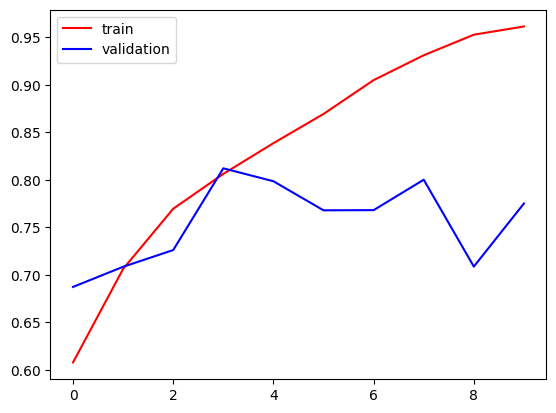

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()
plt.show()


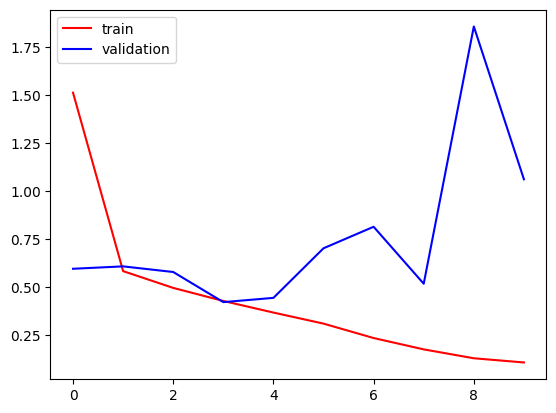

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

plt.legend()
plt.show()


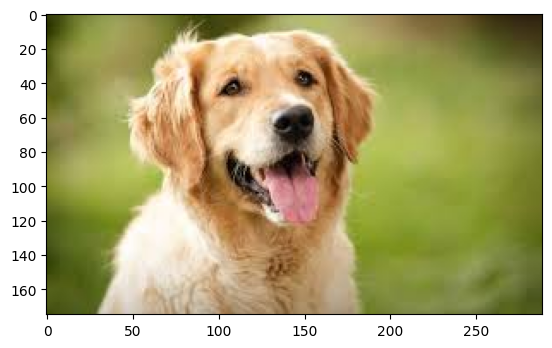

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread("/content/dog1.jpeg")#can change the dog to cat by downloading photos from google


# Convert BGR to RGB (OpenCV loads images in BGR format)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(175, 289, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
prediction = model.predict(test_input)[0][0]  # Extract the single value

# Get class names
# class_names = train_ds.class_names

# Determine predicted class
predicted_label = class_names[1] if prediction < 0.5 else class_names[0]

# Print result
print(f"Predicted Class: {predicted_label} (Confidence: {prediction:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
Predicted Class: dogs (Confidence: 0.0000)


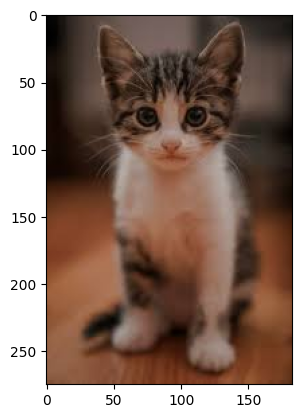

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread("/content/cat1.jpeg")#can change the dog to cat by downloading photos from google


# Convert BGR to RGB (OpenCV loads images in BGR format)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(275, 183, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
prediction = model.predict(test_input)[0][0]  # Extract the single value

# Get class names
# class_names = train_ds.class_names

# Determine predicted class
predicted_label = class_names[0] if prediction < 0.5 else class_names[1]

# Print result
print(f"Predicted Class: {predicted_label} (Confidence: {prediction:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: cats (Confidence: 0.0000)


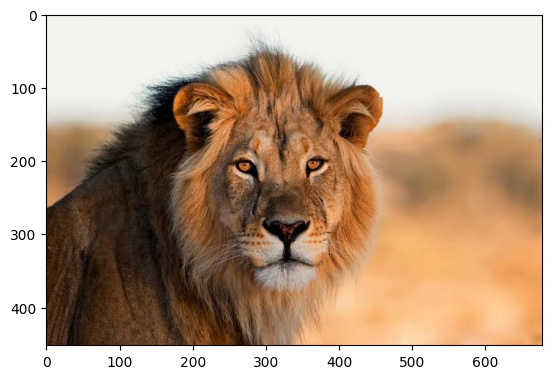

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread("/content/lion1.jpeg")#can change the dog to cat by downloading photos from google


# Convert BGR to RGB (OpenCV loads images in BGR format)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(452, 678, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
prediction = model.predict(test_input)[0][0]  # Extract the single value

# Get class names
# class_names = train_ds.class_names

# Determine predicted class
predicted_label = class_names[0] if prediction < 0.5 else class_names[1]

# Print result
print(f"Predicted Class: {predicted_label} (Confidence: {prediction:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: cats (Confidence: 0.0000)
